In [1]:
suppressMessages(library(SPEI))
source("../../wwa_model-fitting.R")

In [2]:
mu0 <- 5
alpha <- 1

set.seed(42)
df <- read.table("gmst.dat", col.names = c("year", "gmst"))
df <- df[df$year <= 2024,]
df$mean <- mu0 + exp((alpha * df$gmst) / mu0)
df$pr <- df$mean + rgamma(nrow(df), shape = 2)

spi_est <- spi(ts(df$pr, start = c(1879,1), end = c(2024, 1), deltat = 1), scale = 1, ref.start = c(1980,1), ref.end = c(2010, 1))
df$spi <- c(spi_est$fitted)


mdl_shift <- fit_ns("norm", type = "shift", data = df, varnm = "spi", covnm_1 = "gmst")
mdl_scale <- fit_ns("norm", type = "fixeddisp", data = df, varnm = "spi", covnm_1 = "gmst")

In [3]:
# shift fit is actually a better fit
aic(mdl_shift)
aic(mdl_scale)

[1] 431.0283

[1] 433.0371

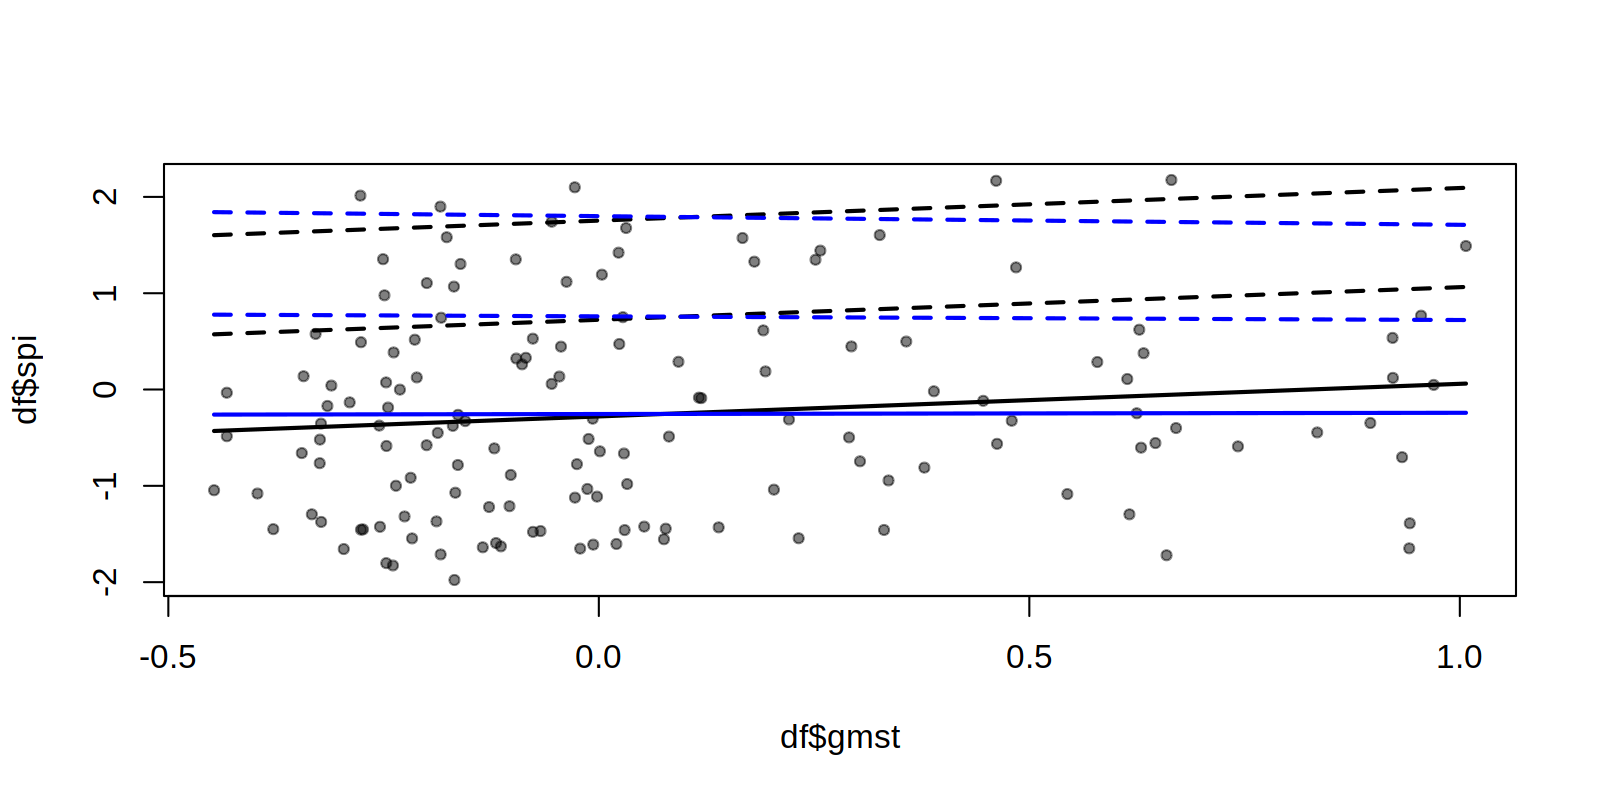

In [4]:
prep_window(c(1,2)); par(mfrow = c(1,1))

plot(df$gmst, df$spi, pch = 20, col = adjustcolor("black", alpha = 0.5))
lines(df$gmst, ns_pars(mdl_shift)$loc, lwd = 2)
lines(df$gmst, ns_pars(mdl_scale)$loc, lwd = 2, col = "blue")

lines(sort(df$gmst), eff_return_level(mdl_shift, 6)[order(df$gmst)], lwd = 2, lty = 2)
lines(sort(df$gmst), eff_return_level(mdl_shift, 40)[order(df$gmst)], lwd = 2, lty = 2)

lines(sort(df$gmst), eff_return_level(mdl_scale, 6)[order(df$gmst)], lwd = 2, lty = 2, col = "blue")
lines(sort(df$gmst), eff_return_level(mdl_scale, 40)[order(df$gmst)], lwd = 2, lty = 2, col = "blue")

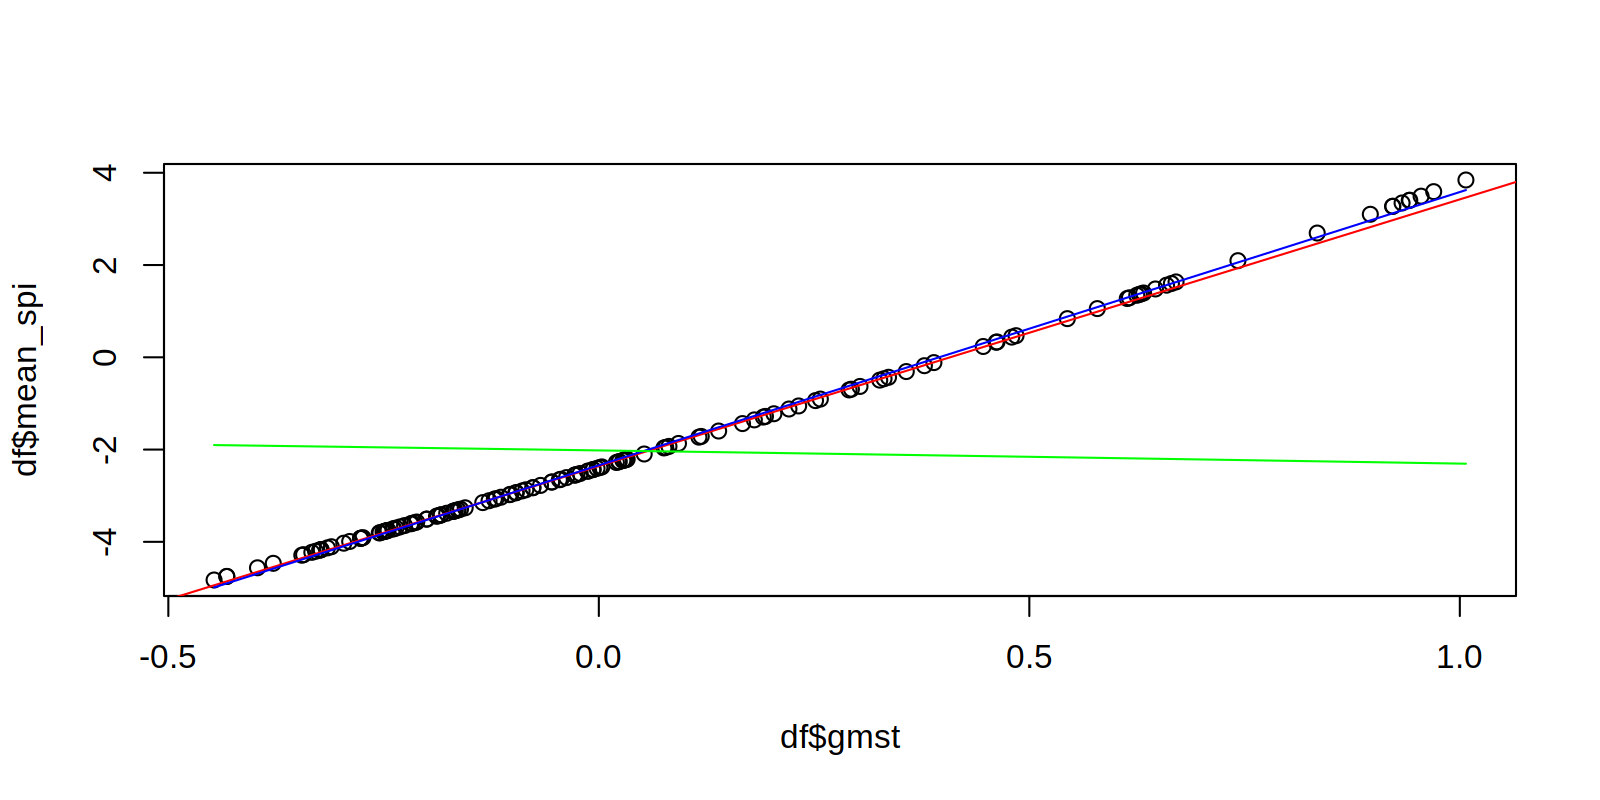

In [15]:
# what do the standardised mean values look like?
# (almost certainly a terrible idea but let's see what this comes up with)
spi_mean <- spi(ts(df$mean, start = c(1879,1), end = c(2024, 1), deltat = 1), scale = 1, ref.start = c(1980,1), ref.end = c(2010, 1))
df$mean_spi <- c(spi_mean$fitted)

mmdl_shift <- fit_ns("norm", type = "shift", data = df, varnm = "mean_spi", covnm_1 = "gmst")
mmdl_scale <- fit_ns("norm", type = "fixeddisp", data = df, varnm = "mean_spi", covnm_1 = "gmst")

plot(df$gmst, df$mean_spi)
abline(line(df$gmst, df$mean_spi), col = "red")

lines(df$gmst, ns_pars(mmdl_shift)$loc, col = "blue")
lines(df$gmst, ns_pars(mmdl_scale)$loc, col = "green")
# well that clinches it